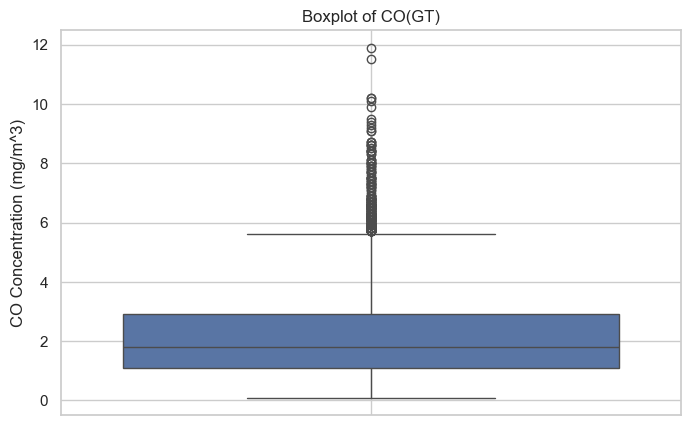

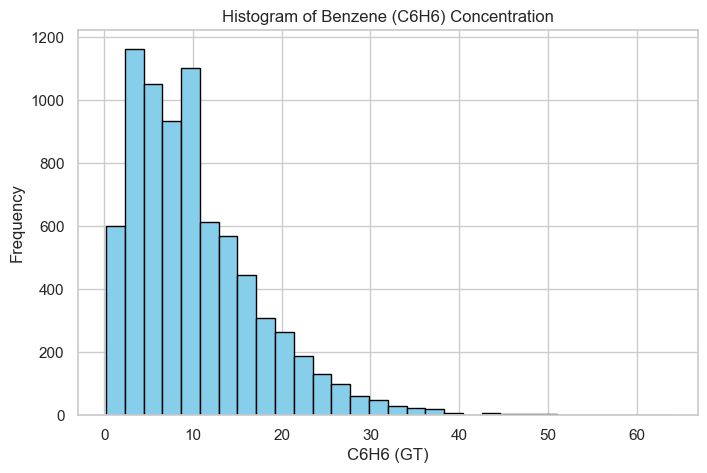

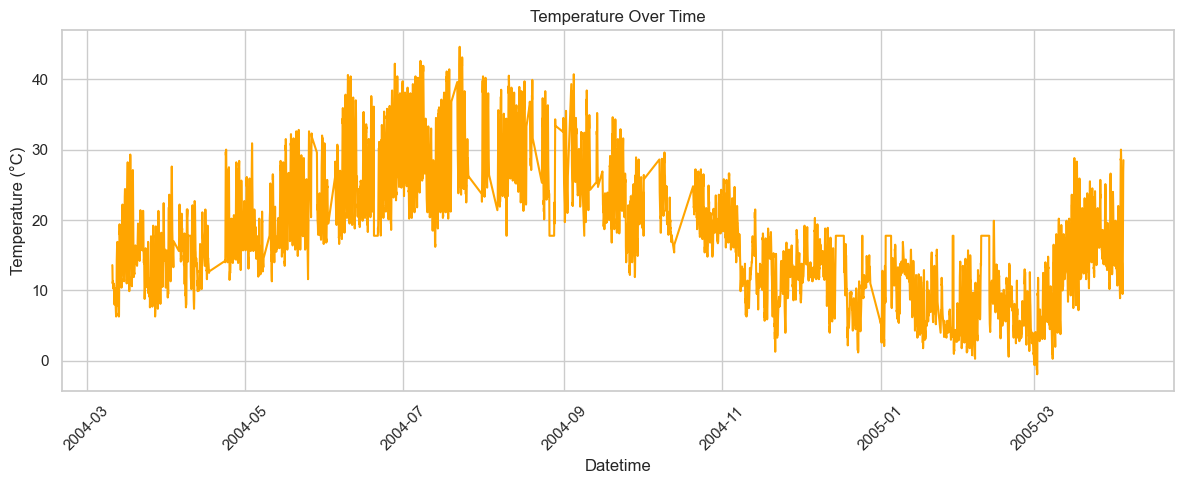

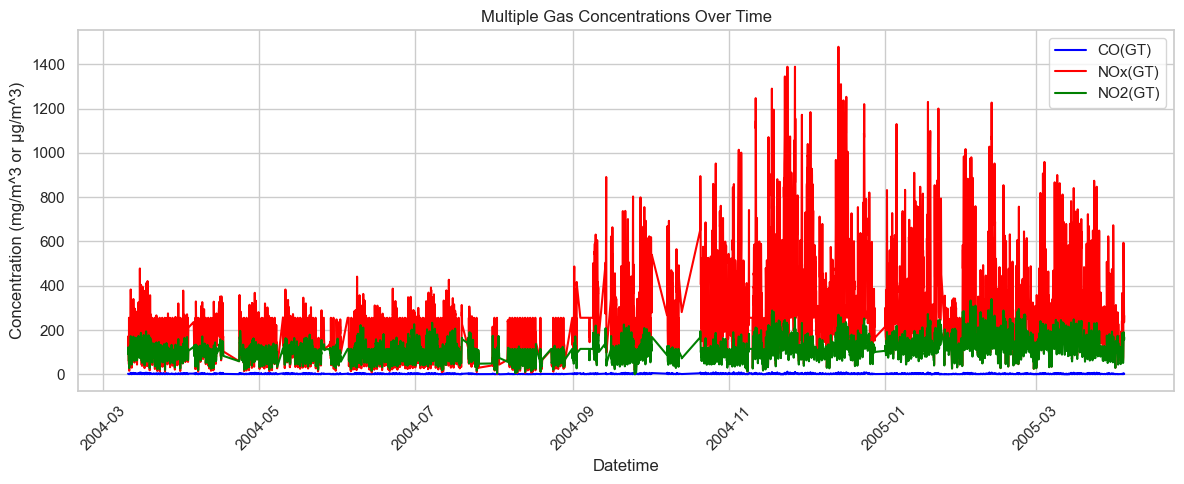

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load dataset
df = pd.read_csv('AirQualityUCI.csv', sep=',', encoding='utf-8-sig')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Replace -200 with np.nan
df.replace(-200, np.nan, inplace=True)

# Drop rows where target variable is missing
df.dropna(subset=['CO(GT)'], inplace=True)

# Fill other missing values with column means
df.fillna(df.mean(numeric_only=True), inplace=True)

# Combine Date and Time into a datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True)
df.set_index('Datetime', inplace=True)
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Set Seaborn style
sns.set(style="whitegrid")

# Boxplot for CO(GT)
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['CO(GT)'])
plt.title("Boxplot of CO(GT)")
plt.ylabel("CO Concentration (mg/m^3)")
plt.grid(True)
plt.show()

# Histogram for Benzene (C6H6) - after dropping NaNs
plt.figure(figsize=(8, 5))
benzene = df['C6H6(GT)'].dropna()
plt.hist(benzene, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Benzene (C6H6) Concentration")
plt.xlabel("C6H6 (GT)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Single line graph - Temperature over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['T'], color='orange')
plt.title("Temperature Over Time")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# Multiple line graph - CO, NOx, NO2 over time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['CO(GT)'], label='CO(GT)', color='blue')
plt.plot(df.index, df['NOx(GT)'], label='NOx(GT)', color='red')
plt.plot(df.index, df['NO2(GT)'], label='NO2(GT)', color='green')
plt.title("Multiple Gas Concentrations Over Time")
plt.xlabel("Datetime")
plt.ylabel("Concentration (mg/m^3 or µg/m^3)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()
